In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
# Stock Analysis (AMD VS INTEL)

In [21]:
path = 'C:\\Users\\pawan\\Desktop\\work\\Time Series Data Analysis\\2-Time Series Data Analysis\\individual_stocks_5yr\\'
company_list = ['INTC_data.csv','AMD_data.csv']

all_data_in_one = pd.DataFrame()

for file in company_list:
    directory_of_file = path+file
    current_df = pd.read_csv(directory_of_file)
    all_data_in_one = pd.concat([all_data_in_one, current_df])
    
all_data_in_one.shape


(2518, 7)

In [22]:
all_data_in_one

,date,open,high,low,close,volume,Name
0,2013-02-08,20.90,21.09,20.880,21.00,28148314,INTC
1,2013-02-11,21.00,21.06,20.920,21.03,18896125,INTC
2,2013-02-12,21.03,21.25,20.990,21.19,28388112,INTC
3,2013-02-13,21.22,21.30,21.145,21.25,21266821,INTC
4,2013-02-14,21.13,21.28,21.060,21.23,35261070,INTC
...,...,...,...,...,...,...,...
1254,2018-02-01,13.62,13.84,13.210,13.25,67543333,AMD
1255,2018-02-02,13.05,13.06,12.430,12.45,79432558,AMD
1256,2018-02-05,12.05,12.18,10.930,11.57,116568862,AMD
1257,2018-02-06,11.04,11.74,11.000,11.65,87123202,AMD


In [23]:
all_data_in_one.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [24]:
# we have to convert date dtype from object to datetime
# so that we can use date in graph

In [25]:
all_data_in_one['date']=pd.to_datetime(all_data_in_one['date'])

In [26]:
all_data_in_one.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [27]:
all_data_in_one.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [28]:
# problem 1 : Analysing closing price of stocks

In [29]:
company_code = all_data_in_one['Name'].unique()
company_code

array(['INTC', 'AMD'], dtype=object)

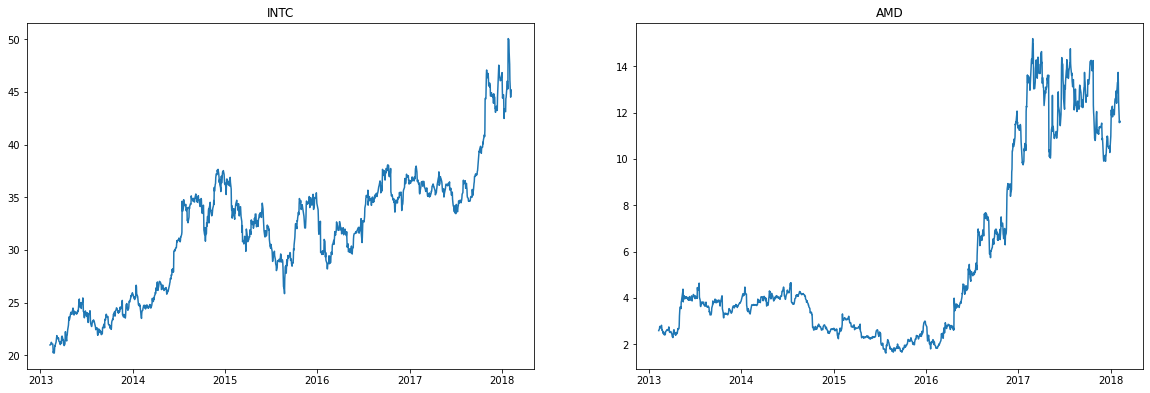

In [30]:
plt.figure(figsize=(20,14))
for i, company in enumerate(company_code,1):
    plt.subplot(2, 2, i)
    df=all_data_in_one[all_data_in_one['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)


In [31]:
# problem 2 : Total volume of stock being traded everyday

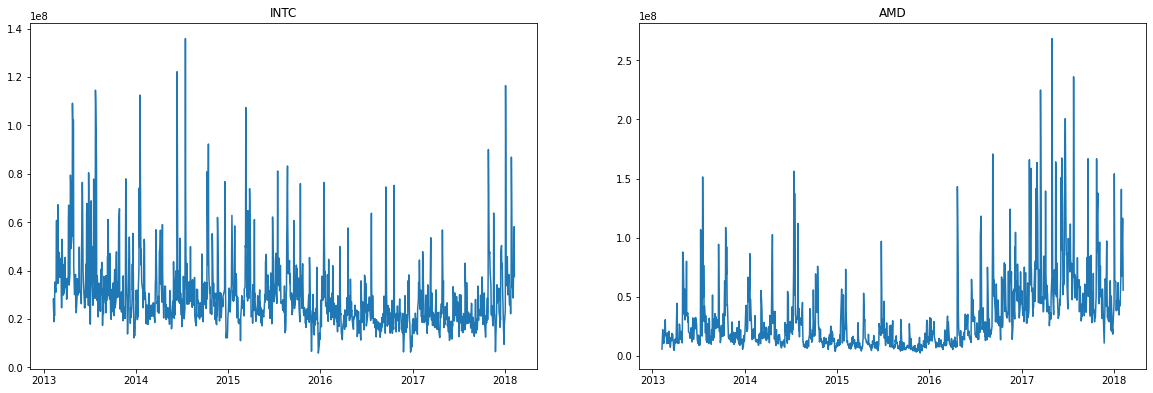

In [32]:
plt.figure(figsize=(20,14))
for i, company in enumerate(company_code,1):
    plt.subplot(2, 2, i)
    df=all_data_in_one[all_data_in_one['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)

In [33]:
import plotly.express as px

In [34]:

for company in (company_code):
    df=all_data_in_one[all_data_in_one['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company)
    fig.show()

In [ ]:
# analyse Daily price change in stock

In [37]:
AMD = pd.read_csv('C:\\Users\\pawan\\Desktop\\work\\Time Series Data Analysis\\2-Time Series Data Analysis\\individual_stocks_5yr\\AMD_data.csv')
INTC = pd.read_csv('C:\\Users\\pawan\\Desktop\\work\\Time Series Data Analysis\\2-Time Series Data Analysis\\individual_stocks_5yr\\INTC_data.csv')

In [40]:
AMD.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,2.580,2.60,2.58,2.59,5971768,AMD
1,2013-02-11,2.590,2.70,2.59,2.67,22410941,AMD
2,2013-02-12,2.705,2.78,2.69,2.77,13675442,AMD
3,2013-02-13,2.810,2.83,2.73,2.75,11481985,AMD
4,2013-02-14,2.740,2.75,2.69,2.75,13283766,AMD


In [41]:
INTC.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,20.90,21.09,20.880,21.00,28148314,INTC
1,2013-02-11,21.00,21.06,20.920,21.03,18896125,INTC
2,2013-02-12,21.03,21.25,20.990,21.19,28388112,INTC
3,2013-02-13,21.22,21.30,21.145,21.25,21266821,INTC
4,2013-02-14,21.13,21.28,21.060,21.23,35261070,INTC


In [42]:
AMD['1day % return']=((AMD['close']-AMD['open'])/AMD['close'])*100
AMD.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,2.580,2.60,2.58,2.59,5971768,AMD,0.386100
1,2013-02-11,2.590,2.70,2.59,2.67,22410941,AMD,2.996255
2,2013-02-12,2.705,2.78,2.69,2.77,13675442,AMD,2.346570
3,2013-02-13,2.810,2.83,2.73,2.75,11481985,AMD,-2.181818
4,2013-02-14,2.740,2.75,2.69,2.75,13283766,AMD,0.363636


In [43]:
INTC['1day % return']=((INTC['close']-INTC['open'])/INTC['close'])*100
INTC.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,20.90,21.09,20.880,21.00,28148314,INTC,0.476190
1,2013-02-11,21.00,21.06,20.920,21.03,18896125,INTC,0.142653
2,2013-02-12,21.03,21.25,20.990,21.19,28388112,INTC,0.755073
3,2013-02-13,21.22,21.30,21.145,21.25,21266821,INTC,0.141176
4,2013-02-14,21.13,21.28,21.060,21.23,35261070,INTC,0.471032


In [50]:
AMD['date']=pd.to_datetime(AMD['date'])      # converted to datetime format
INTC['date']= pd.to_datetime(INTC['date'])

In [ ]:
# visualise data using plotly

In [55]:
fig1 = px.line(AMD, x="date", y="1day % return", title='AMD')
fig2 = px.line(INTC, x="date", y="1day % return", title='INTC')
fig1.show()
fig2.show()

In [ ]:
# lets say for some interval we have to plot data then, we can ude this method

(array([15826., 15949., 16071., 16191., 16314., 16436., 16556., 16679.,
        16801., 16922.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

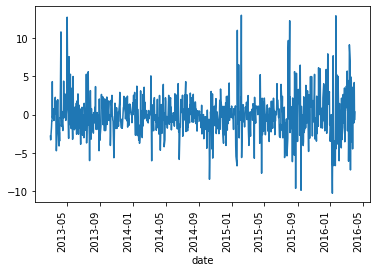

In [58]:
AMD.set_index('date')['2013-02-28':'2016-03-31']['1day % return'].plot()
plt.xticks(rotation='vertical')

In [ ]:
# Analyse monthly mean of close column

In [61]:
AMD_copy = AMD.copy()
INTC_copy = INTC.copy()

In [64]:
AMD_copy['date']=pd.to_datetime(AMD_copy['date'])
INTC_copy['date']=pd.to_datetime(INTC_copy['date'])


In [65]:
AMD_copy.set_index('date',inplace=True)

In [66]:
INTC_copy.set_index('date',inplace=True)

In [80]:
AMD_copy['close'].resample('M').mean()


date
2013-02-28     2.641429
2013-03-31     2.561000
2013-04-30     2.510909
2013-05-31     3.906364
2013-06-30     4.006000
                ...    
2017-10-31    13.278636
2017-11-30    11.270476
2017-12-31    10.370000
2018-01-31    12.356667
2018-02-28    12.104000
Freq: M, Name: close, Length: 61, dtype: float64

In [81]:
INTC_copy['close'].resample('M').mean()

date
2013-02-28    20.851429
2013-03-31    21.478500
2013-04-30    22.223636
2013-05-31    24.111045
2013-06-30    24.616000
                ...    
2017-10-31    40.594545
2017-11-30    45.549048
2017-12-31    44.976500
2018-01-31    45.487143
2018-02-28    45.686000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

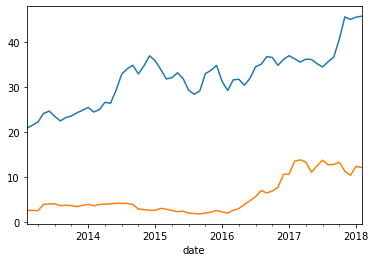

In [82]:
INTC_copy['close'].resample('M').mean().plot()
AMD_copy['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

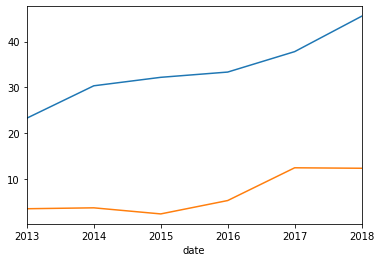

In [83]:
INTC_copy['close'].resample('Y').mean().plot()
AMD_copy['close'].resample('Y').mean().plot()

In [ ]:
# Checking if the Stock prices of these companies(INTEL, AMD) are correlated 

In [86]:
# creating a new blank dataframe
close_of_AMD_and_Intel=pd.DataFrame()

In [87]:
close_of_AMD_and_Intel['AMD'] = AMD_copy['close']
close_of_AMD_and_Intel['INTC'] = INTC_copy['close']

In [88]:
close_of_AMD_and_Intel

,AMD,INTC
date,,
2013-02-08,2.59,21.00
2013-02-11,2.67,21.03
2013-02-12,2.77,21.19
2013-02-13,2.75,21.25
2013-02-14,2.75,21.23
...,...,...
2018-02-01,13.25,47.65
2018-02-02,12.45,46.15
2018-02-05,11.57,44.52


In [ ]:
# Multi-variate Analysis

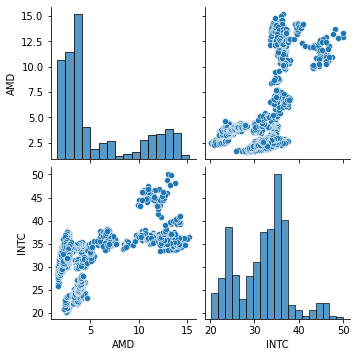

In [89]:
sns.pairplot(data=close_of_AMD_and_Intel)

In [ ]:
# co-relation plot for stock prices

<AxesSubplot:>

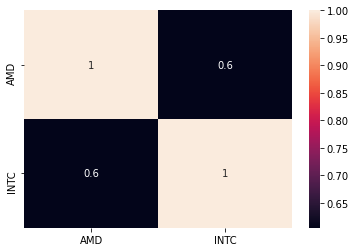

In [90]:
sns.heatmap(close_of_AMD_and_Intel.corr(),annot=True)

In [ ]:
# Analyse Daily return of each stock & how they are co-related

In [91]:
daily_return = pd.DataFrame()

In [92]:
daily_return['AMD'] = ((AMD['close']-AMD['open'])/AMD['close'])*100
daily_return['INTC'] = ((INTC['close']-INTC['open'])/INTC['close'])*100

In [93]:
daily_return

,AMD,INTC
0,0.386100,0.476190
1,2.996255,0.142653
2,2.346570,0.755073
3,-2.181818,0.141176
4,0.363636,0.471032
...,...,...
1254,-2.792453,-0.094439
1255,-4.819277,-2.535211
1256,-4.148660,-4.110512
1257,5.236052,1.981741


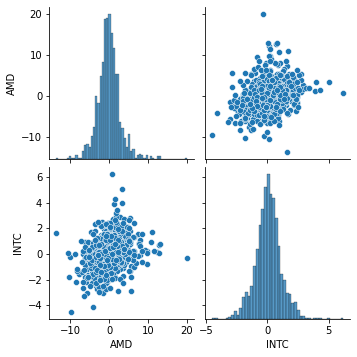

In [94]:
sns.pairplot(data=daily_return)

<AxesSubplot:>

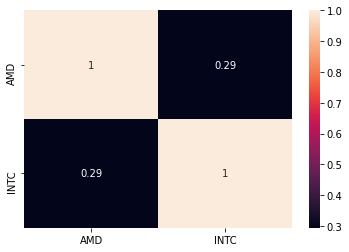

In [95]:
sns.heatmap(daily_return.corr(),annot=True)

In [ ]:
# Value at Risk analysis for AMD and INTC

<AxesSubplot:xlabel='INTC', ylabel='Density'>

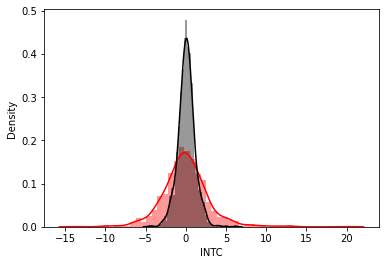

In [101]:
sns.distplot(daily_return['AMD'],color='red')
sns.distplot(daily_return['INTC'],color='black')

In [ ]:
# they are following normal distribution

In [109]:
print('AMD : {0} and intel : {1}'.format(daily_return['AMD'].std(),daily_return['INTC'].std()))

AMD : 2.886311186962525 and intel : 1.0630337735143764


In [110]:
print('AMD : {0} and intel : {1}'.format(daily_return['AMD'].quantile(0.1),daily_return['INTC'].quantile(0.1)))

AMD : -3.2715415196319295 and intel : -1.1747739194179883


In [ ]:
''' [-3.2715415196319295 means that 90% of the times the worst daily Loss of AMD will not exceed 3.27 ]  and  [-1.1747739194179883 means that 90% of the times the worst daily Loss of INTC will not exceed -1.17 ]

In [111]:
daily_return.describe()

,AMD,INTC
count,1259.000000,1259.000000
mean,-0.040714,0.080267
std,2.886311,1.063034
min,-13.662791,-4.522613
25%,-1.651319,-0.528401
50%,-0.074571,0.089153
75%,1.419927,0.694074
max,20.050125,6.218750
